# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 02__

__Nombres de los estudiantes: Jorge Arevalo Echevarria y Jesus Martin Moraleda__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `prestamos.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `loan_amnt` es la cantidad de dinero solicitada en dólares
  - `purpose` es el propósito para el que se solicitó el préstamo
  - `revenue` son los ingresos anuales en dólares de la persona que solicitó el préstamos
  - `dti_n` es el porcentaje de endeudamiento sobre los ingresos anuales de la persona que solicitó el préstamo
  - `fico_n` se trata de un indicador de solvencia de la persona que solicitó el préstamo. A mayor puntuación, mayor solvencia, y además se cuenta con estos rangos orientativoss:
    - 300-550: Pobre
    - 550-620: Subprime (alto riesgo)
    - 620-680: Crédito aceptable
    - 680-740: Buen crédito
    - 740-850: Excelente crédito

  -`home_ownership_n` es una variable categórica que indica la situación de vivienda en la que vive la persona solicitante
    - `OWN` es en propiedad
    - `MORTAGAGE` indica que está hipotecada
    - `RENT` indica que vive en alquiler
    - `OTHER` es una categoría que agrega otras posibilidades

- `emp_length` es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información, los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.
- `Default` es la variable que usaremos como **variable objetivo** del conjunto de datos e indica si la persona incumplió (incurrió en *default*) o no el préstamo.


Como pandas no tiene forma de saber que las variables `home_ownership_n`, `purpose`, `emp_length` y `Default` son en realidad categóricas, debes indicárselo tú.

In [62]:
import pandas as pd
 
df = pd.read_csv("prestamos.csv")

In [44]:
print(df)

       loan_amnt   purpose   revenue  dti_n  fico_n home_ownership_n  \
0          32000       car  135000.0  18.93   687.0         MORTGAGE   
1          32000       car   90000.0   9.29   822.0         MORTGAGE   
2          30000       car   95000.0   1.34   722.0             RENT   
3          25750       car  230000.0   6.42   747.0         MORTGAGE   
4          25200       car   72000.0  30.95   692.0              OWN   
...          ...       ...       ...    ...     ...              ...   
13789       1275  vacation   42000.0  31.89   792.0             RENT   
13790       1200  vacation   36000.0  12.27   747.0         MORTGAGE   
13791       1000  vacation   76000.0  25.26   702.0         MORTGAGE   
13792       1000  vacation   32000.0  17.70   747.0         MORTGAGE   
13793       1000  vacation   55000.0  14.90   682.0         MORTGAGE   

       emp_length_n  Default  
0                 1        0  
1                10        1  
2                11        0  
3          

In [45]:
df["home_ownership_n"] = df["home_ownership_n"].astype("category")
df["purpose"] = df["purpose"].astype("category")
df["emp_length_n"] = df["emp_length_n"].astype("category")
df["Default"] = df["Default"].astype("category")
df.dtypes

loan_amnt              int64
purpose             category
revenue              float64
dti_n                float64
fico_n               float64
home_ownership_n    category
emp_length_n        category
Default             category
dtype: object

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

count: Son los valores válidos observados (incluyendo repeticiones)

Para las columnas con valores numéricos
    mean: Media aritmética
    std: Desviación típica
    min: Valor mínimo observado
    25%: Percentil del 25% (o primer cuartil), es decir, el valor que deja a su izquierda el 25% de los datos
    50%: Percentil del 50% (o segundo cuartil, o mediana), es decir, el valor que deja a su izquierda el 50% de los datos
    75%: Percentil del 75% (o tercer cuartil), es decir, el valor que deja a su izquierda el 25% de los datos
    max: Valor máximo observado

In [5]:
#analisis de los datos
#dfNum.describe(include='all')
df.describe(include='all')

,loan_amnt,purpose,revenue,dti_n,fico_n,home_ownership_n,emp_length_n,Default
count,13794.000000,13794,1.379400e+04,13794.000000,13794.000000,13794,13794.0,13794.0
unique,NaN,12,NaN,NaN,NaN,4,12.0,2.0
top,NaN,debt_consolidation,NaN,NaN,NaN,MORTGAGE,11.0,0.0
freq,NaN,7841,NaN,NaN,NaN,6850,4612.0,10785.0
mean,14507.833116,NaN,7.973730e+04,18.825106,699.106822,NaN,NaN,NaN
std,9037.938271,NaN,5.646358e+04,9.795986,32.825754,NaN,NaN,NaN
min,1000.000000,NaN,7.000000e+03,0.000000,662.000000,NaN,NaN,NaN
25%,7300.000000,NaN,4.800000e+04,12.200000,672.000000,NaN,NaN,NaN
50%,12000.000000,NaN,6.800000e+04,18.085000,692.000000,NaN,NaN,NaN
75%,20000.000000,NaN,9.700000e+04,24.757500,717.000000,NaN,NaN,NaN


In [6]:
#correlacion de las variables
df.corr()

,loan_amnt,revenue,dti_n,fico_n
loan_amnt,1.000000,0.424460,0.034134,0.090869
revenue,0.424460,1.000000,-0.137616,0.091204
dti_n,0.034134,-0.137616,1.000000,-0.057580
fico_n,0.090869,0.091204,-0.057580,1.000000


<AxesSubplot:xlabel='loan_amnt', ylabel='fico_n'>

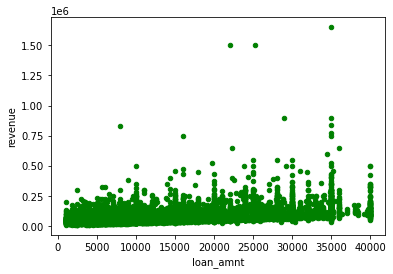

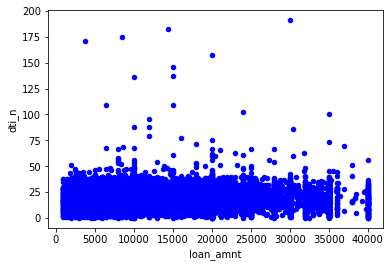

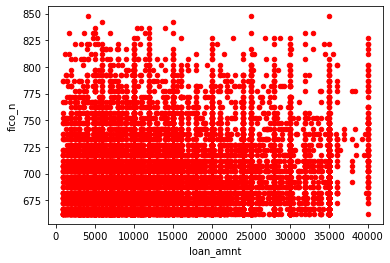

In [7]:
# El análisis bivariante, muestra la relación entre dos variables.
df.plot.scatter(x='loan_amnt', y='revenue', c='Green')
df.plot.scatter(x='loan_amnt', y='dti_n', c='Blue')
df.plot.scatter(x='loan_amnt', y='fico_n', c='Red')

array([[<AxesSubplot:xlabel='loan_amnt', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='revenue', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='dti_n', ylabel='loan_amnt'>,
        <AxesSubplot:xlabel='fico_n', ylabel='loan_amnt'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='revenue'>,
        <AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='dti_n', ylabel='revenue'>,
        <AxesSubplot:xlabel='fico_n', ylabel='revenue'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='dti_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='dti_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='dti_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='dti_n'>],
       [<AxesSubplot:xlabel='loan_amnt', ylabel='fico_n'>,
        <AxesSubplot:xlabel='revenue', ylabel='fico_n'>,
        <AxesSubplot:xlabel='dti_n', ylabel='fico_n'>,
        <AxesSubplot:xlabel='fico_n', ylabel='fico_n'>]], dtype=object)

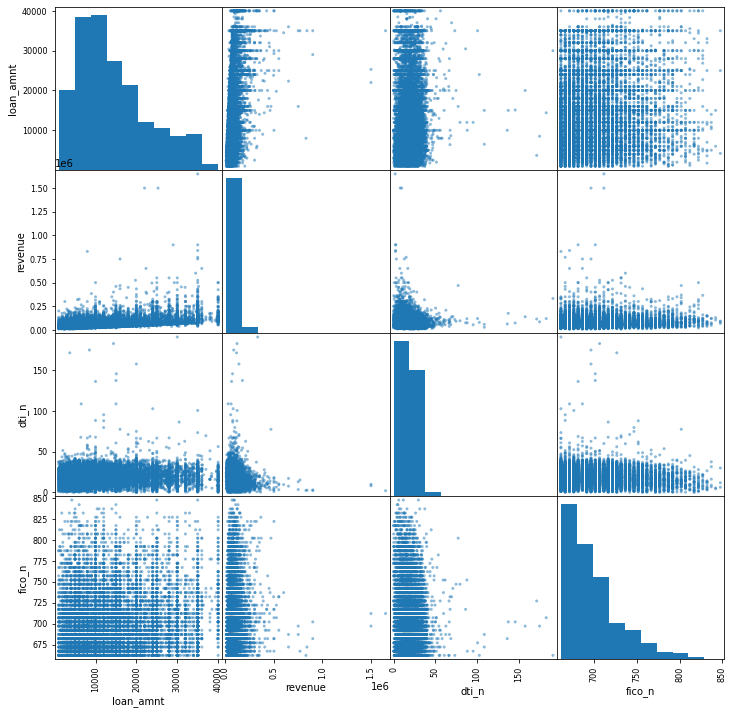

In [8]:
from pandas.plotting import scatter_matrix
%matplotlib inline
#dic_colors = { '0': 'blue', '1': 'red'}
#colors = df['Default'].map(dic_colors)
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist')

Si manejamos pocas variables podemos dibujar (scatter matrix) de todos los pares de variables para comprobar cómo están relacionadas visualmente.
No podemos apreciar mucho de este dibujo ya que los valores son muy grandes, lo que solo nos permite ver donde se concentran la mayoria de los valores de cada variable pudiendo ver los que seran casos aislados o poco comunes.

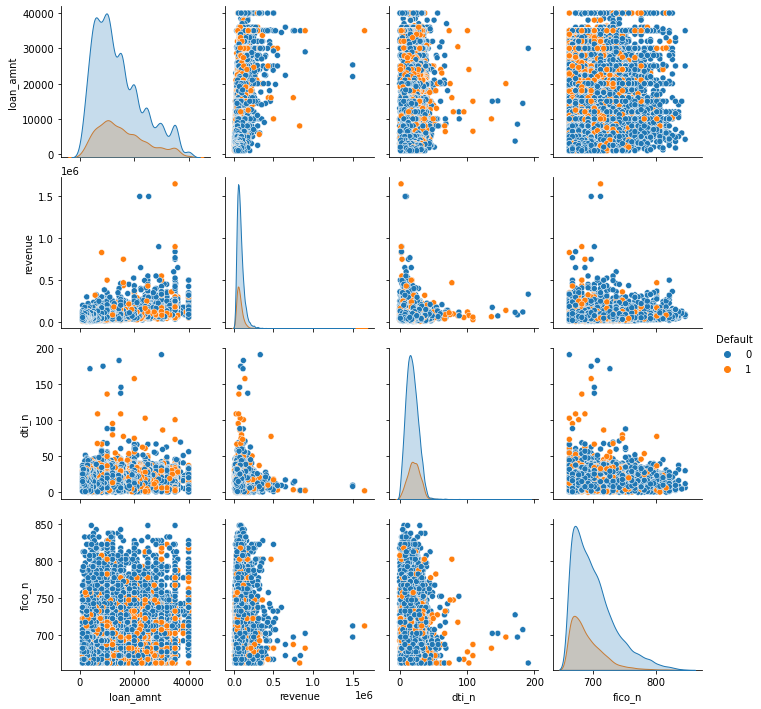

In [9]:
#diagrama de dispersion con color respecto a la variable default
import seaborn as sns
sns.pairplot(df, hue = "Default")

In [10]:
Podemos ver la relacion de cada par de variables teniendo en el eje x o en el eje y cada una de las variables, y podemos
ver cuando relacionamos la variable con si misma (la diagonal) los datos segun cumplan o no cumplan el prestamo(Default) 
y su rango de valores.
Podemos ver que los valores respecto a loan_amnt se distrubuyen uniformemente respecto su rango de valores al igual que fico_n.
Mientras que en la variable revenue podemos ver que sus valores se distribuyen la mayoria entre 0 - 0.5, e igual nos pasa con
dti_n donde vemos que la mayoria de valores estan entre 0 - 80(aproximadamente).
<loan_amnt,revenue> podemos ver que la mayoria de valores estan entre 0 y 0.5 respecto revenue, cumpliendo que
la mayoria que no cumplen el prestamo estan entre 0 y 20000 respecto loan_amnt.
<loan_amnt,dti_n> podemos ver que la mayoria de valores estan entre 0 y 50 respecto dti_n, y podemos observar que se distrubuye 
por el rango de valores los que cumplen y no cumplen el prestamo de la misma forma.
<loan_amnt,fico_n> podemos ver que la mayoria de valore se distribuyen por el rango de valores de forma uniforme,
sin poder diferenciar de forma clara los que cumplen o no cumplen el prestamo.
Se analizaria igual para el resto de las variables que faltan.

SyntaxError: invalid syntax (Temp/ipykernel_15796/2392774095.py, line 1)

In [ ]:
sns.pairplot(df, hue = "Default",diag_kind="hist")


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

Mostrar la relacion respecto cada una de las variables con sus diagramas de frecuencia

In [ ]:
Seguiremos con la columna de frecuencia relativa, la columna de frecuencias relativas es la misma información
que la columna de frecuencias abosolutas pero representada en porcentajes.
Realizaremos la relacion respecto a la variable Default:
    #Default es la variable que usaremos como variable objetivo del conjunto de datos e indica si la persona
    #incumplió(incurrió en default) o no el préstamo.

In [11]:
#home_ownership_n indica la situación de vivienda en la que vive la persona solicitante
    #OWN es en propiedad
    #MORTAGAGE indica que está hipotecada
    #RENT indica que vive en alquiler
    #OTHER es una categoría que agrega otras posibilidades

In [12]:
#tabla que nos muestra el numero de personas que esta en hipotecada(MORTGAGE), en propiedad(OWN), alquuiler(RENT),otros(OTHER)
#frecuencia Absoluta
pd.value_counts(df['home_ownership_n'])

MORTGAGE    6850
RENT        5349
OWN         1586
OTHER          9
Name: home_ownership_n, dtype: int64

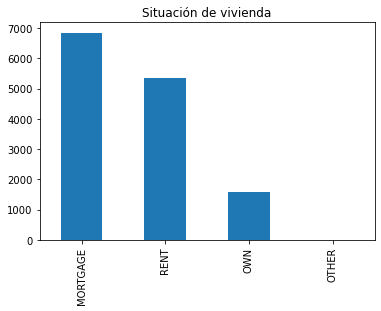

In [13]:
# Gráfico de barras de segun la situacion de la vivienda
#podemos observar que la mayor situacion suele ser hipotecado, o en alquiler, mientras que en propiedad
#son casos bajos respecto al resto, y otros motivos es casi despreciable viendo que son casos aislados
plot = df['home_ownership_n'].value_counts().plot(kind='bar',title='Situación de vivienda')

In [14]:
# tabla de frecuencia segun la situacion de la vivienda en porcentaje(Relativa)
100 * df['home_ownership_n'].value_counts() / len(df['home_ownership_n'])

MORTGAGE    49.659272
RENT        38.777729
OWN         11.497753
OTHER        0.065246
Name: home_ownership_n, dtype: float64

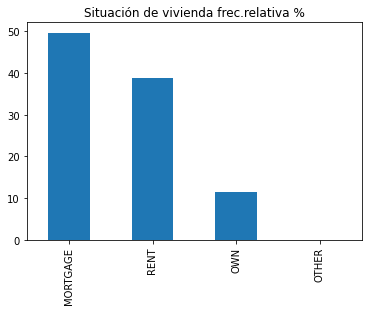

In [15]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['home_ownership_n'].value_counts() / len(df['home_ownership_n'])).plot(
kind='bar', title='Situación de vivienda frec.relativa %')

In [16]:
# Tabla de contingencia situacion/incumplio contrato
pd.crosstab(index=df['home_ownership_n'],
            columns=df['Default'], margins=True)

Default,0,1,All
home_ownership_n,,,
MORTGAGE,5576,1274,6850
OTHER,7,2,9
OWN,1233,353,1586
RENT,3969,1380,5349
All,10785,3009,13794


In [17]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['home_ownership_n'], columns=df['Default'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Default,0,1,All
home_ownership_n,,,
MORTGAGE,40.423372,9.235900,49.659272
OTHER,0.050747,0.014499,0.065246
OWN,8.938669,2.559084,11.497753
RENT,28.773380,10.004350,38.777729
All,78.186168,21.813832,100.000000


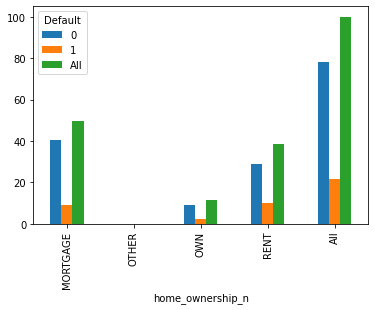

In [21]:
# Gráfico de barras de contingencia en porcentajes relativos total
plot = pd.crosstab(index=df['home_ownership_n'], columns=df['Default'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1).plot(kind='bar')

Con esta tabla podemos ver que el 49.65% de los clientes que pidieron 
un prestamo estan hipotecados, dentro de los hipotecados un 9.23% cumplieron
el prestamos mientras que el 40.42% no lo cumplieron.
El 11,49% estan en propiedad(OWN) y de ellos 8.93% cumplieron el prestamo y
2.55% lo incumplieron.
El 38.77% estan de alquiler(RENT) y de ellos un 28.77% ha incumplido en prestamo, 
y un 10% lo ha cumplido.
y con otros podemos ver que hay pocos casos menos del 0.1%.
Podemos ver en general que en general el 78,18% ha incumplido el contrato, y 
el 21.81% ha cumplido el contrato.


este analisis lo haremos para cada una de las variables categoricas

In [ ]:
#purpose es el propósito para el que se solicitó el préstamo

In [25]:
#frecuencia Absoluta
pd.value_counts(df['purpose'])

debt_consolidation    7841
credit_card           2960
home_improvement      1016
other                  883
major_purchase         337
medical                163
car                    154
small_business         145
moving                 124
vacation                88
house                   70
renewable_energy        13
Name: purpose, dtype: int64

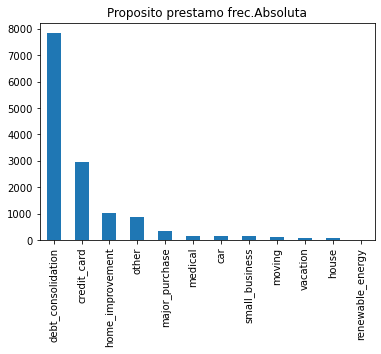

In [27]:
# Gráfico de barras Frecuencias absolutas segun el motivo del prestamo
plot = df['purpose'].value_counts().plot(kind='bar',title='Proposito prestamo frec.Absoluta')

In [22]:
# tabla de frecuencia Relativa segun el proposito del prestamo
100 * df['purpose'].value_counts() / len(df['purpose'])

debt_consolidation    56.843555
credit_card           21.458605
home_improvement       7.365521
other                  6.401334
major_purchase         2.443091
medical                1.181673
car                    1.116427
small_business         1.051182
moving                 0.898942
vacation               0.637959
house                  0.507467
renewable_energy       0.094244
Name: purpose, dtype: float64

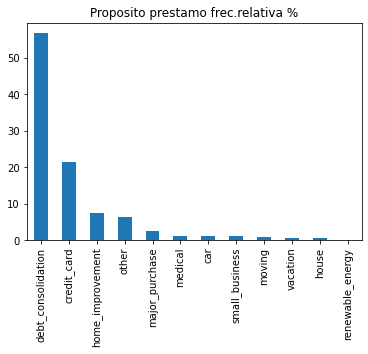

In [23]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['purpose'].value_counts() / len(df['purpose'])).plot(
kind='bar', title='Proposito prestamo frec.relativa %')

podemos observar que el proposito mayor es debt_consolidation(56.84%) siendo mas del doble, casi siendo el triple que el segundo  que es credit_card(21,45%), despues los siguientes mas signifcativos serian home_improvement(7.35%) y other(6.4%). Podemos observar que el resto de campos rondan entre el 0 y 1.2 % siendo menos significativos y casi casos especiales.

In [18]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['purpose'], columns=df['Default'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Default,0,1,All
purpose,,,
car,0.906191,0.210236,1.116427
credit_card,17.558359,3.900246,21.458605
debt_consolidation,43.373931,13.469624,56.843555
home_improvement,6.038857,1.326664,7.365521
house,0.362476,0.144991,0.507467
major_purchase,1.979121,0.463970,2.443091
medical,0.942439,0.239234,1.181673
moving,0.717703,0.181238,0.898942
other,4.994925,1.406409,6.401334


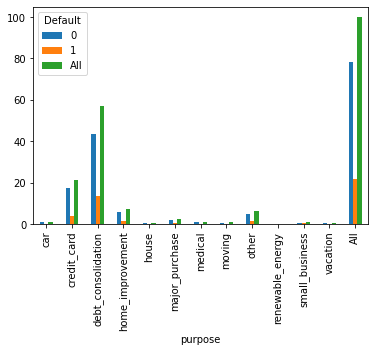

In [24]:
# Gráfico de barras de contingencia en porcentajes relativos total
plot = pd.crosstab(index=df['purpose'], columns=df['Default'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1).plot(kind='bar')

Como siempre nos sale respecto a la variable "Default" que el 78.18% no cumple el prestamo, mientras el resto 21.81% si lo cumple. Pero en esta tabla lo que nos facilita es poder ver el porcentaje del motivo por el que se ha solicitado el prestamo, ademas de ver el porcentaje que ha cumplido o no cumplido el prestamo por dicho motivo. Es decir por ejemplo tenemos los que han pedido un prestamo por un coche, que es el 1.11% , el 0.9% no han pagado el prestamo mientras que el 0.21% si lo ha podido pagar.

In [ ]:
#emp_length_n es una variable ordinal, no es estrictamente numérica, ya que el valor 0 denota que no consta información,
#los valores entre 1 y 10 indican una permanencia inferior a X años, y el valor 11 indica una permanencia superior a 10 años.


In [29]:
#frecuencia Absoluta
pd.value_counts(df['emp_length_n'])

11    4612
3     1232
1     1174
4     1174
2      909
0      875
6      860
5      815
9      599
7      580
10     494
8      470
Name: emp_length_n, dtype: int64

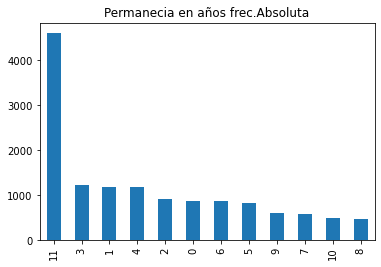

In [30]:
# Gráfico de barras Frecuencias absolutas segun la permanecia en años
plot = df['emp_length_n'].value_counts().plot(kind='bar',title='Permanecia en años frec.Absoluta')
#podemos observar que los mayores casos son mas de 10 años, mientras que entre 1 - 10 son valores parecidos

In [31]:
# tabla de frecuencia Relativa segun la permanecia en años
100 * df['emp_length_n'].value_counts() / len(df['emp_length_n'])

11    33.434827
3      8.931419
1      8.510947
4      8.510947
2      6.589822
0      6.343338
6      6.234595
5      5.908366
9      4.342468
7      4.204727
10     3.581267
8      3.407279
Name: emp_length_n, dtype: float64

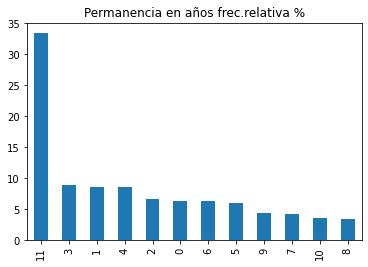

In [32]:
# gráfico de barras de frecuencias relativas.
plot = (100 * df['emp_length_n'].value_counts() / len(df['emp_length_n'])).plot(
kind='bar', title='Permanencia en años frec.relativa %')

In [33]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['emp_length_n'], columns=df['Default'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

Default,0,1,All
emp_length_n,,,
0,4.458460,1.884877,6.343338
1,6.633319,1.877628,8.510947
2,5.060171,1.529651,6.589822
3,7.010294,1.921125,8.931419
4,6.821807,1.689140,8.510947
5,4.625199,1.283167,5.908366
6,4.806438,1.428157,6.234595
7,3.211541,0.993185,4.204727
8,2.718573,0.688705,3.407279


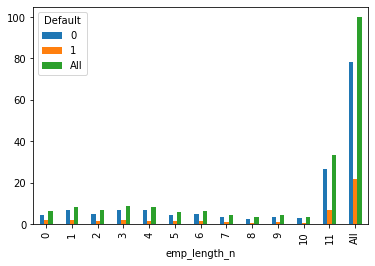

In [35]:
# Gráfico de barras de contingencia en porcentajes relativos total
plot = pd.crosstab(index=df['emp_length_n'], columns=df['Default'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1).plot(kind='bar')

En el grafico y en la tabla, como hemos descrito para anteriores variables podemos ver la relacion de los que cumplen el prestamo, con la permanencia en años del prestamo. En este caso vemos que la mayoria suele ser a mas de 10 años y vemos que entre 1-10 los valores son similares, siendo tambien similar en proporcion en cada año los que cumplen o no cumplen el prestamo.

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables verdaderamente numéricas. Crea un nuevo dataframe que sólo contenga las variables `loan_amnt`, `revenue`, `dti_n` y `fico_n`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de préstamos similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [3]:
dfNum = df[['loan_amnt', 'revenue', 'dti_n','fico_n']]
print(dfNum)
#lo mas seguro q toque estandarizarlos

       loan_amnt   revenue  dti_n  fico_n
0          32000  135000.0  18.93   687.0
1          32000   90000.0   9.29   822.0
2          30000   95000.0   1.34   722.0
3          25750  230000.0   6.42   747.0
4          25200   72000.0  30.95   692.0
...          ...       ...    ...     ...
13789       1275   42000.0  31.89   792.0
13790       1200   36000.0  12.27   747.0
13791       1000   76000.0  25.26   702.0
13792       1000   32000.0  17.70   747.0
13793       1000   55000.0  14.90   682.0

[13794 rows x 4 columns]


Las dos técnicas más populares para escalar datos numéricos antes del modelado son la normalización y la estandarización.

Normalización escala cada variable de entrada por separado al rango 0-1, que es el rango para valores de punto flotante donde
tenemos la mayor precisión.

Estandarización escala cada variable de entrada por separado restando la media (llamado centrado) y dividiendo por la desviación
estándar para cambiar la distribución para que tenga una media de cero y una desviación estándar de uno.


Los atributos a menudo se normalizan para que se encuentren en un rango fijo, generalmente de cero a uno, dividiendo todos los 
valores por el valor máximo encontrado o restando el valor mínimo y dividiendo por el rango entre los valores máximo y mínimo.

In [9]:
#Probaremos con el reescalado usando los valores mínimo y máximo.
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
dfNumMinMax = dfNum
dfNumMinMax[['loan_amnt (minmax)', 'revenue (minmax)','dti_n (minmax)', 'fico_n (minmax)']] = min_max_scaler.fit_transform(dfNumMinMax[['loan_amnt', 'revenue', 'dti_n','fico_n']])
dfNumMinMax.head()

,loan_amnt,revenue,dti_n,fico_n,loan_amnt (minmax),revenue (minmax),dti_n (minmax),fico_n (minmax)
0,32000,135000.0,18.93,687.0,0.794872,0.077906,0.099177,0.134771
1,32000,90000.0,9.29,822.0,0.794872,0.050517,0.048672,0.862534
2,30000,95000.0,1.34,722.0,0.743590,0.053561,0.007020,0.323450
3,25750,230000.0,6.42,747.0,0.634615,0.135727,0.033635,0.458221
4,25200,72000.0,30.95,692.0,0.620513,0.039562,0.162152,0.161725


(-0.049999999999999996,
 1.0499999999999998,
 -0.05000000000000002,
 1.0500000000000003)

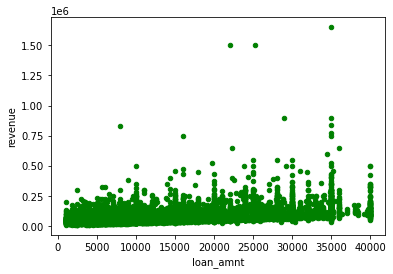

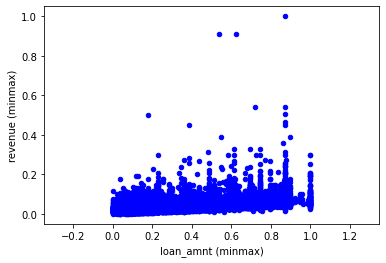

In [10]:
#Comprobamos el efecto en el gráfico de dispersión. Creamos el de referencia con las variables originales.

scatter0 = dfNumMinMax.plot.scatter(x='loan_amnt', y='revenue', c='Green')
scatter1 = dfNumMinMax.plot.scatter(x='loan_amnt (minmax)', y='revenue (minmax)', c='Blue')
scatter1.axis('equal')

In [ ]:
Estandarizar un conjunto de datos implica reescalar la distribución de valores para que la media de los valores observados sea 0 
y la desviación estándar sea 1. Esto se puede considerar como restar el valor medio o centrar los datos.

La técnica consiste en calcular la media estadística y la desviación estándar de los valores de los atributos, restar la media
de cada valor y dividir el resultado por la desviación estándar. Este proceso se llama estandarizar una variable estadística y
da como resultado un conjunto de valores cuya media es cero y la desviación estándar es uno.

Por ejemplo, cuando se utilizan los productos de distancia o puntos entre predictores (como K vecinos más cercanos) 
un procedimiento de estandarización es esencial.


In [5]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

# Fase de ajuste
dfNumScaler = dfNum


standard_scaler.fit(dfNumScaler[['loan_amnt', 'revenue', 'dti_n','fico_n']])
dfNumScaler[['loan_amnt (scaler)', 'revenue (scaler)','dti_n (scaler)', 'fico_n (scaler)']] = standard_scaler.transform(dfNumScaler[['loan_amnt', 'revenue', 'dti_n','fico_n']])

# Fase de transformación
#df[['sepal length (standard)']] = standard_scaler.transform(df[['sepal length (cm)']])

dfNumScaler.head()

C:\Users\jorge\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,loan_amnt,revenue,dti_n,fico_n,loan_amnt (scaler),revenue (scaler),dti_n (scaler),fico_n (scaler)
0,32000,135000.0,18.93,687.0,1.935486,0.978767,0.010708,-0.368834
1,32000,90000.0,9.29,822.0,1.935486,0.181764,-0.973404,3.743939
2,30000,95000.0,1.34,722.0,1.714188,0.270320,-1.784990,0.697440
3,25750,230000.0,6.42,747.0,1.243931,2.661329,-1.266392,1.459065
4,25200,72000.0,30.95,692.0,1.183075,-0.137037,1.237786,-0.216509


ya que vemos mejores valores para entrenar el algoritmo k-Means y ya que nos representa mejor la distancia entre puntos  con standart_scaler sera la que ultilizaremos.

In [25]:
#A continuación, podemos deshacer la transformación sobre los datos escalados, reestableciendo los valores originales. 
#Para ello usamos `inverse_transform`
#dfNumScaler[['loan_amnt (redux)']] = standard_scaler.inverse_transform(dfNumScaler[['loan_amnt (scaler)']])
#dfNumScaler.head()

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo con la puntuación (con la función `KMeans.score()`), el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [73]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [15]:
dfNumSinEscalar = df[['loan_amnt', 'revenue', 'dti_n','fico_n']]
print(dfNumSinEscalar)

       loan_amnt   revenue  dti_n  fico_n
0          32000  135000.0  18.93   687.0
1          32000   90000.0   9.29   822.0
2          30000   95000.0   1.34   722.0
3          25750  230000.0   6.42   747.0
4          25200   72000.0  30.95   692.0
...          ...       ...    ...     ...
13789       1275   42000.0  31.89   792.0
13790       1200   36000.0  12.27   747.0
13791       1000   76000.0  25.26   702.0
13792       1000   32000.0  17.70   747.0
13793       1000   55000.0  14.90   682.0

[13794 rows x 4 columns]


In [54]:
dfNum = dfNumSinEscalar.copy()
dfNum = standard_scaler.transform(dfNum)
print(dfNum)


[[ 1.93548578  0.97876727  0.01070826 -0.36883419]
 [ 1.93548578  0.18176447 -0.973404    3.74393934]
 [ 1.71418835  0.27032033 -1.78499035  0.69744042]
 ...
 [-1.49462437 -0.06619196  0.65691475  0.08814064]
 [-1.49462437 -0.84548359 -0.11485793  1.45906515]
 [-1.49462437 -0.4381266  -0.40069966 -0.52115914]]


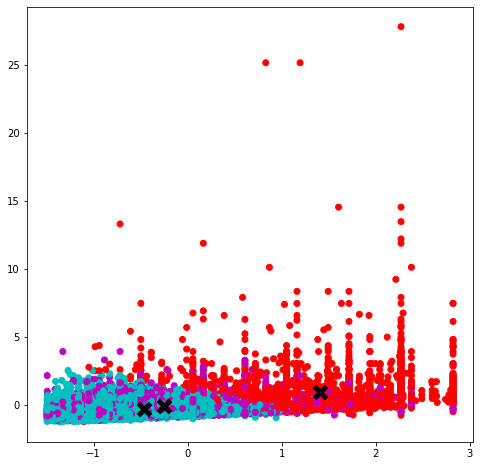

In [17]:
# Crear una instancia del agrupador k-means siendo k =3
km = KMeans(init='random', n_clusters=3, random_state=333)

# Agrupar los puntos en clusters
km.fit(dfNum)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(dfNum, labels, centers)

Cuando usamos k-means tenemos que especificar el número de clusters que queremos crear y a veces no sabemos cuántas agrupaciones deberíamos crear. Una opción es realizar varias agrupaciones con distintos valores de K y estudiar cómo de homogéneos son los clusters resultantes.

En el siguiente ejemplo generamos agrupaciones con valores de K entre 2 y 10, y estudiamos cómo aumenta el índice de Davies–Bouldin que se define como la razón entre las distancias intra-cluster y las distancias inter-cluster. Es decir, el índice tendrá un valor más pequeño cuando más compactos y separados estén los clusters.

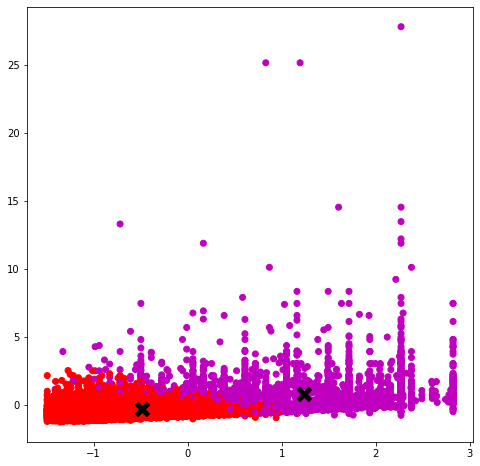

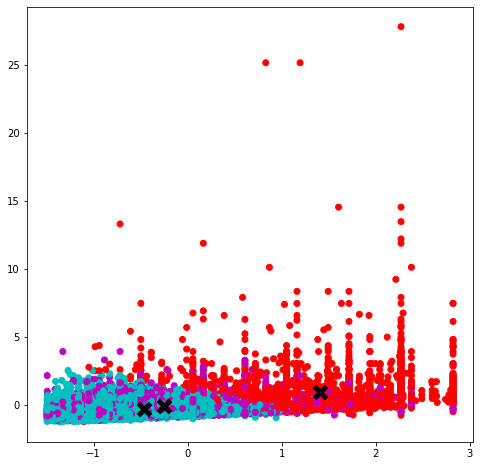

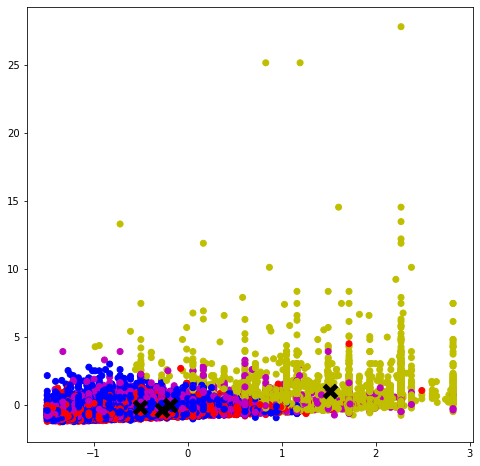

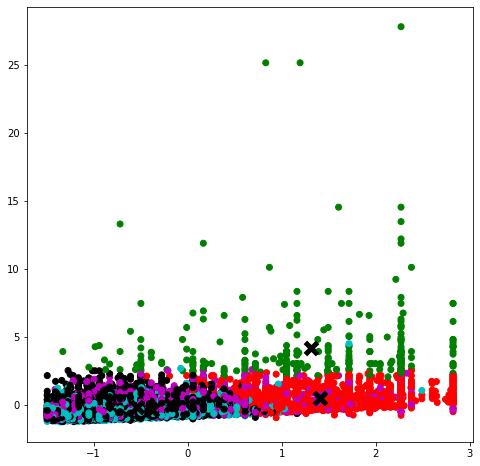

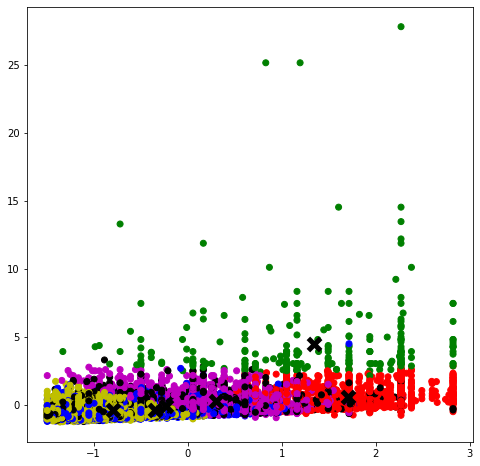

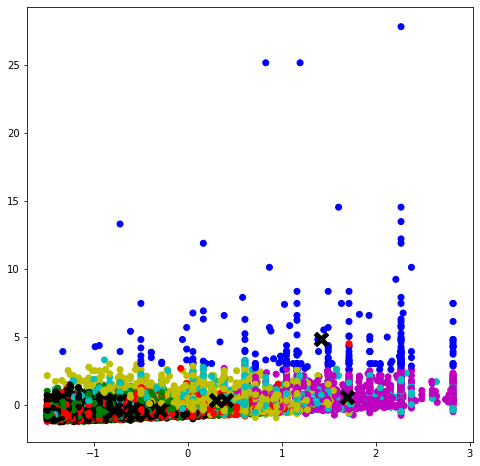

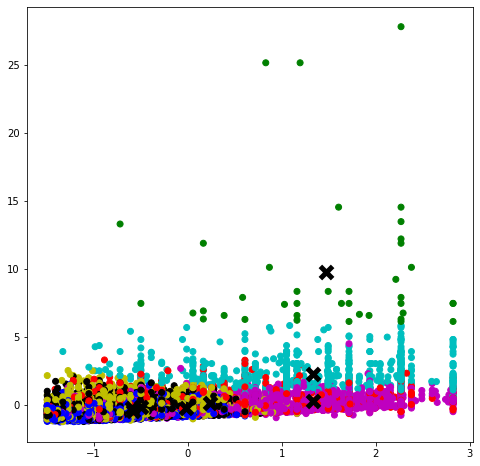

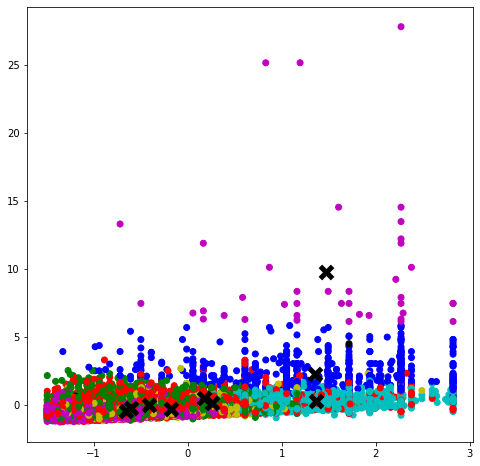

In [18]:
#el índice davies_boulding
import numpy as np
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(dfNum)
    plot_clusters(dfNum, km.labels_, km.cluster_centers_)
    
    davies_boulding[k-2] = davies_bouldin_score(dfNum, km.labels_) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

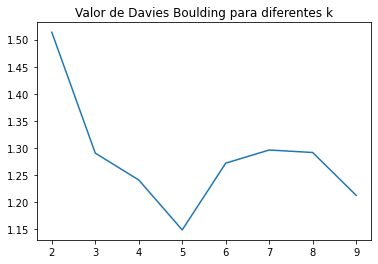

In [19]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')


A continuación pintamos el valor del índice de Davies–Bouldin para distintos valores de K. Podemos observar que el mejor valor (el más pequeño) se obtiene para k = 5 

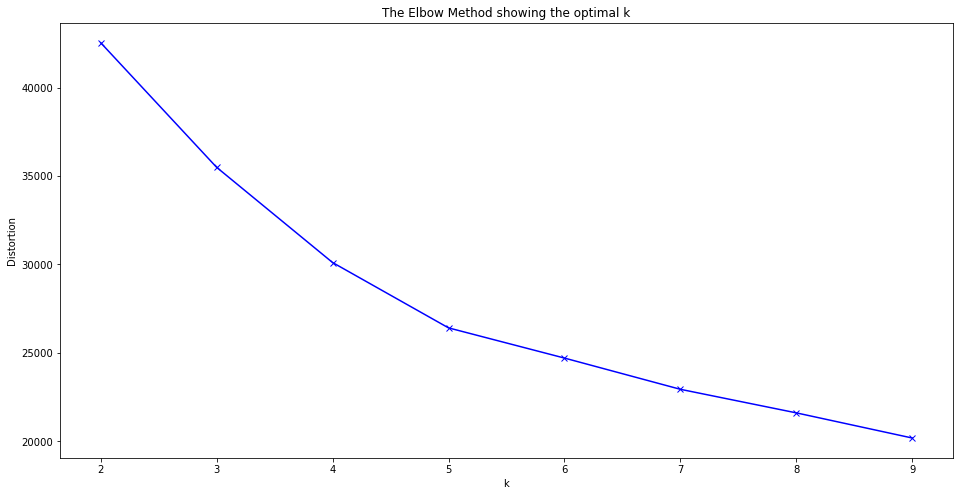

In [20]:
#diagrama del codo
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfNum)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


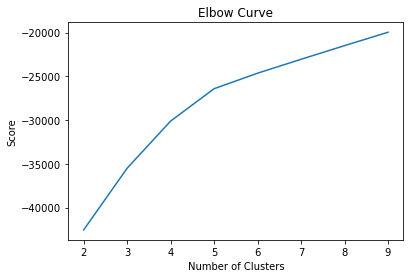

In [21]:
#como podemos ver con kmenas.score tambien nos sale k = 5
Nc = range(2, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dfNum).score(dfNum) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

como podemos ver donde mas puede parecer que tiene la forma de codo seria cuando k = 5 que coincide con el algoritmo davies_boulding. 

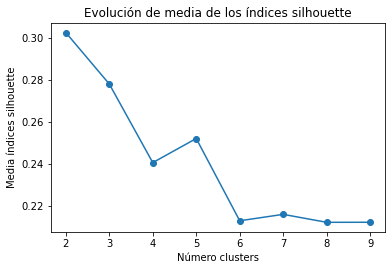

In [26]:
from sklearn.metrics import silhouette_score

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 10)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(dfNum)
    silhouette_avg = silhouette_score(dfNum, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

La puntuación de silueta está limitada en el rango de -1 a 1 . La puntuación de separación más cercana a 1 es la más grande, lo que indica que se obtiene un coeficiente de silueta ideal, ya que la puntuación de separación cuantifica cuán diferente es una muestra de otros conglomerados y la puntuación de cohesión indica cuán similar es a las otras muestras en su propio conglomerado.

A partir de los resultados anteriores, se puede saber que la silueta del coeficiente de contorno promedio tiende a aproximadamente 0.255, es decir, la diferencia entre clases es mayor, mientras que la diferencia dentro de las clases es menor. Esto muestra que la configuración actual del número de grupos es 5, que es más apropiado, y también encaja bien con el gradiente de caída del coeficiente codo codo de hasta 3.

Cuando el número de grupos de contraste se establece en 3, el coeficiente de contorno del centro del grupo de 2 es menor, que tiende a 0.21, es decir, la diferencia entre la diferencia entre grupos y la diferencia dentro de los grupos no es tan buena como el resultado de establecer el número de grupos en 6. El efecto de agrupación con el número de agrupaciones establecido en 2 no es bueno.

El valor medio de los índices silhouette se maximiza con 5 clusters. Acorde a este criterio, K = 5 es la mejor opción.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 3, elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de préstamos quedan en cada cluster? Según dicho perfil, ¿qué cluster te parece que tendrá una mayor tasa de "default"? Corrobóralo calculando para cada cluster la proporción de préstamos que acabaron en "default".

Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

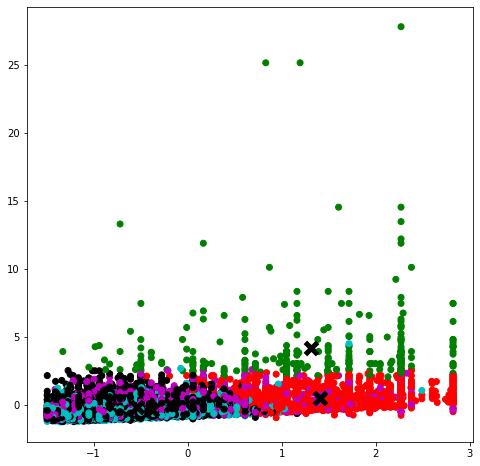

In [77]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=5, random_state=333)

# Agrupar los puntos en clusters
km.fit(dfNum)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_

plot_clusters(dfNum, labels, centers)

In [78]:
#En primer lugar, podemos ver fácilmente los centroídes elegidos, es decir, el valor que toman las variables en el individuo
#prototípico de cada cluster.
km = KMeans(init='random', n_clusters=5, random_state=333)
km.fit(dfNum)


centers = km.cluster_centers_
centers

array([[ 1.40166332,  0.47616836,  0.02031082, -0.09240829],
       [ 1.31009155,  4.16512515, -0.73302448,  0.39884318],
       [-0.3833772 , -0.39974536,  1.03495379, -0.28707739],
       [-0.53870088, -0.21326436, -0.59474443, -0.47044515],
       [-0.17719914, -0.05649249, -0.31740959,  1.78751005]])

También podemos segmentar los individuos de nuestro conjunto de datos según al cluster al que pertenezcan y utilizar estadísticos descriptivos para ver la distribución de las variables (centralidad, dispersión, rangos, etc).

Para ello crearemos un dataframe y le añadiremos la columna de los clusters

In [85]:
import pandas as pd

 
#df1 = pd.DataFrame(data=dfNum, columns=['loan_amnt', 'revenue', 'dti_n','fico_n'])
df1 = df.assign(cluster=pd.Series(data=km.labels_))
print(df1)


       loan_amnt   purpose   revenue  dti_n  fico_n home_ownership_n  \
0          32000       car  135000.0  18.93   687.0         MORTGAGE   
1          32000       car   90000.0   9.29   822.0         MORTGAGE   
2          30000       car   95000.0   1.34   722.0             RENT   
3          25750       car  230000.0   6.42   747.0         MORTGAGE   
4          25200       car   72000.0  30.95   692.0              OWN   
...          ...       ...       ...    ...     ...              ...   
13789       1275  vacation   42000.0  31.89   792.0             RENT   
13790       1200  vacation   36000.0  12.27   747.0         MORTGAGE   
13791       1000  vacation   76000.0  25.26   702.0         MORTGAGE   
13792       1000  vacation   32000.0  17.70   747.0         MORTGAGE   
13793       1000  vacation   55000.0  14.90   682.0         MORTGAGE   

       emp_length_n  Default  cluster  
0                 1        0        0  
1                10        1        4  
2              

In [92]:
#Podemos obtener una descripción buena directamente con pandas
df1.groupby(["cluster"]).describe().transpose()

cluster                         0             1              2              3  \
loan_amnt    count    2881.000000  3.020000e+02    3637.000000    4996.000000   
             mean    27185.230823  2.634793e+04   11047.724773    9641.338070   
             std      5803.257371  8.879728e+03    5500.152402    4763.490894   
             min     10550.000000  2.500000e+03    1000.000000    1000.000000   
             25%     22800.000000  2.000000e+04    6500.000000    6000.000000   
             50%     26050.000000  2.800000e+04   10000.000000   10000.000000   
             75%     32000.000000  3.500000e+04   15000.000000   12800.000000   
             max     40000.000000  4.000000e+04   37000.000000   25000.000000   
revenue      count    2881.000000  3.020000e+02    3637.000000    4996.000000   
             mean   106677.344877  3.149067e+05   57182.368774   67702.252566   
             std     36320.317421  1.701477e+05   25899.625932   31832.214819   
             min     25000.000000  1.890000e+05    7000.000000    8400.000000   
             25%     80000.000000  2.332500e+05   40000.000000   45000.000000   
             50%    100000.000000  2.600000e+05   52000.000000   61000.000000   
             75%    130000.000000  3.237500e+05   70000.000000   84000.000000   
             max    230000.000000  1.650000e+06  332500.000000  221000.000000   
dti_n        count    2881.000000  3.020000e+02    3637.000000    4996.000000   
             mean       19.019566  1.164467e+01      28.960517      12.999291   
             std         7.516473  7.628159e+00       9.393975       5.025965   
             min         0.220000  1.200000e-01      19.000000       0.000000   
             25%        13.860000  6.577500e+00      24.150000       9.340000   
             50%        18.890000  1.031500e+01      27.360000      13.380000   
             75%        23.930000  1.556750e+01      31.800000      17.130000   
             max        62.700000  7.743000e+01     190.870000      23.530000   
fico_n       count    2881.000000  3.020000e+02    3637.000000    4996.000000   
             mean      696.151336  7.121987e+02     689.673907     683.660328   
             std        23.691448  3.833703e+01      20.770508      17.141889   
             min       662.000000  6.620000e+02     662.000000     662.000000   
             25%       677.000000  6.820000e+02     672.000000     667.000000   
             50%       692.000000  7.070000e+02     687.000000     682.000000   
             75%       712.000000  7.320000e+02     707.000000     697.000000   
             max       792.000000  8.270000e+02     782.000000     727.000000   
emp_length_n count    2881.000000  3.020000e+02    3637.000000    4996.000000   
             mean        7.197501  6.953642e+00       6.178169       6.267414   
             std         3.851074  3.842130e+00       4.095953       3.944275   
             min         0.000000  0.000000e+00       0.000000       0.000000   
             25%         4.000000  3.000000e+00       3.000000       3.000000   
             50%         8.000000  7.000000e+00       6.000000       6.000000   
             75%        11.000000  1.100000e+01      11.000000      11.000000   
             max        11.000000  1.100000e+01      11.000000      11.000000   
Default      count    2881.000000  3.020000e+02    3637.000000    4996.000000   
             mean        0.253731  1.688742e-01       0.295573       0.188551   
             std         0.435221  3.752626e-01       0.456363       0.391191   
             min         0.000000  0.000000e+00       0.000000       0.000000   
             25%         0.000000  0.000000e+00       0.000000       0.000000   
             50%         0.000000  0.000000e+00       0.000000       0.000000   
             75%         1.000000  0.000000e+00       1.000000       0.000000   
             max         1.000000  1.000000e+00       1.000000       1.000000   

cluster                       

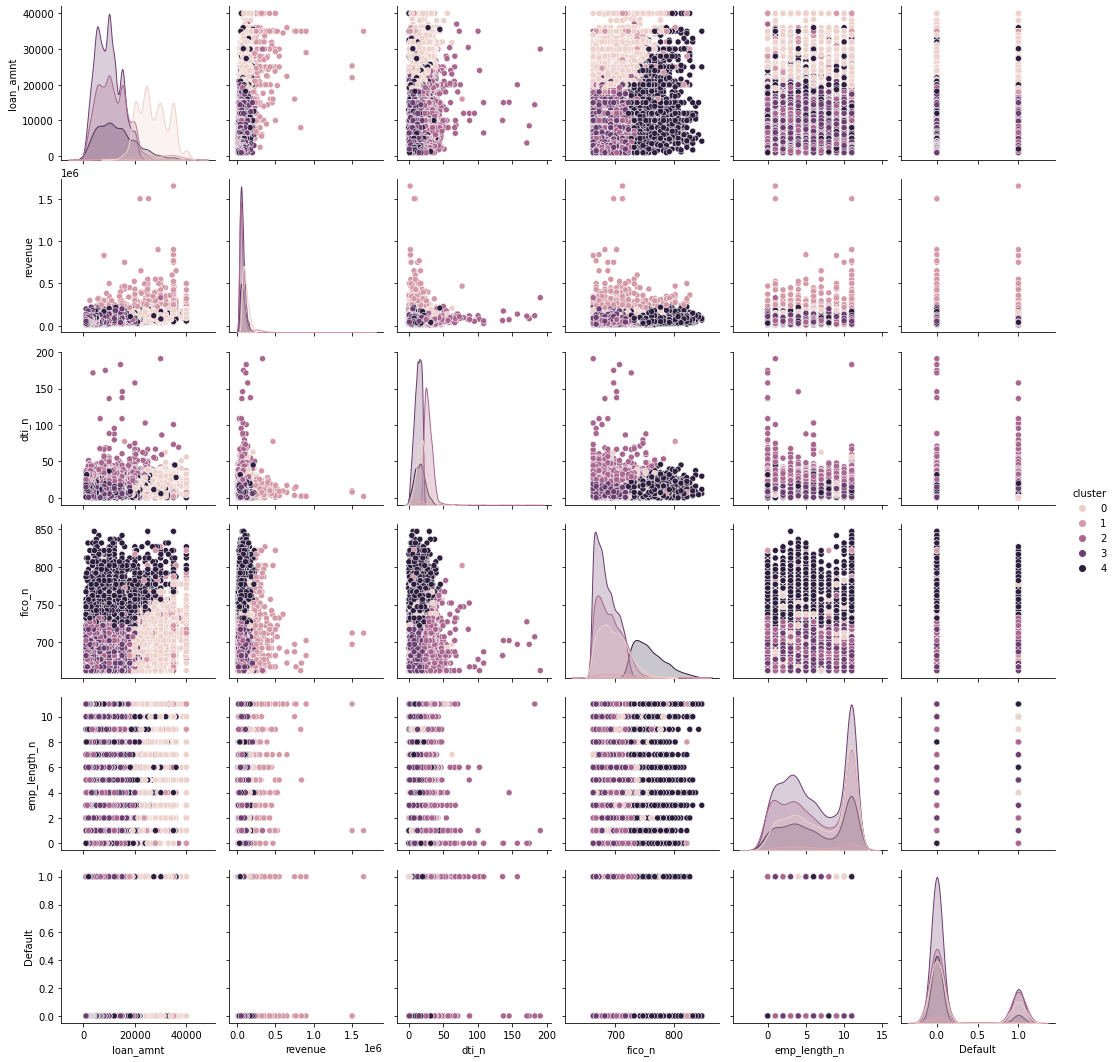

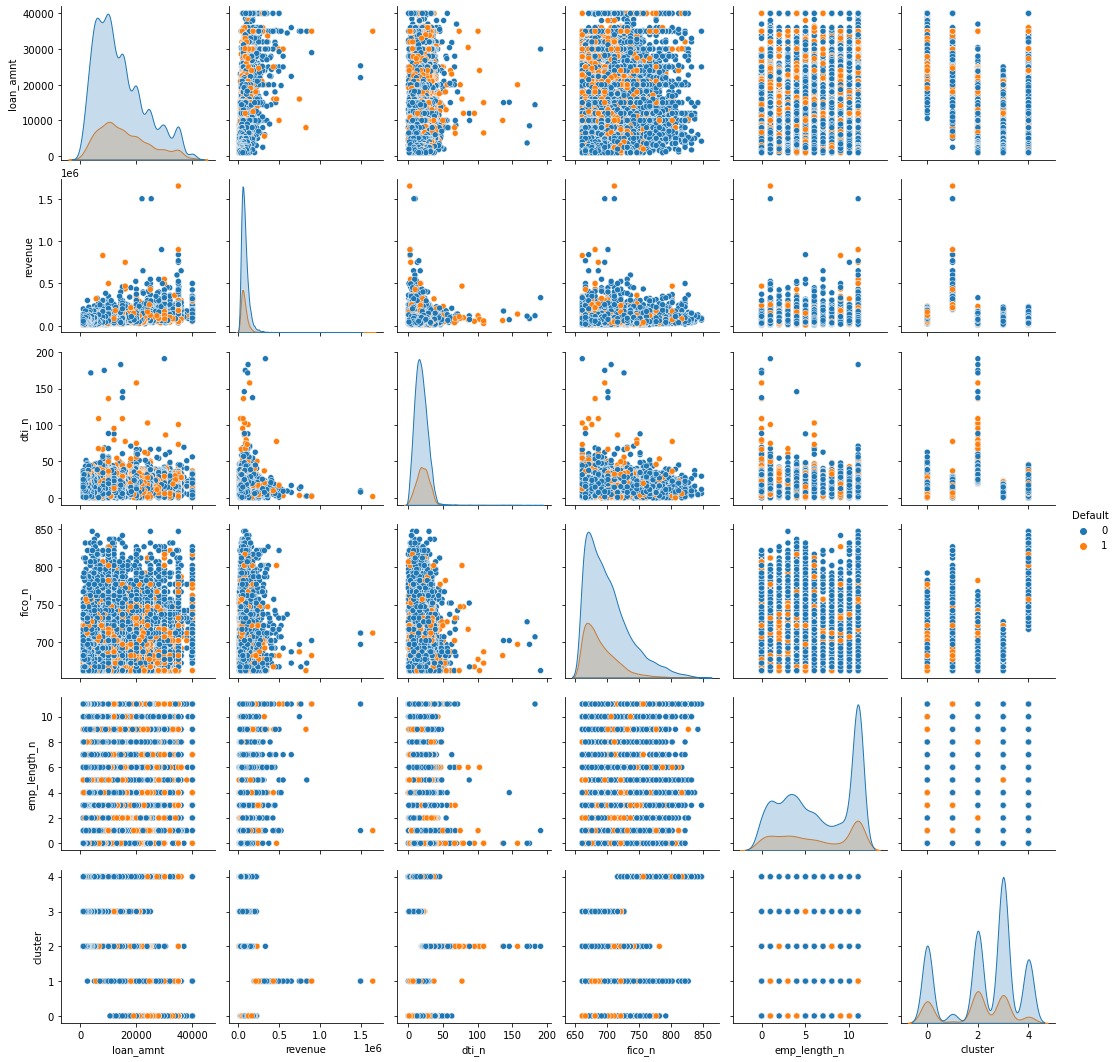

In [98]:

import seaborn as sns
sns.pairplot(df1, hue = "cluster")
sns.pairplot(df1, hue = "Default")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: loan_amnt, dtype: object

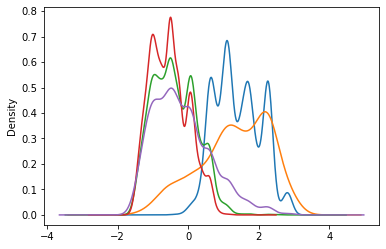

In [39]:
#Incluso visualizar la distribución de sus variable 'loan_amnt', 'revenue', 'dti_n','fico_n'

df.groupby(["cluster"])["loan_amnt"].plot(kind="density")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: revenue, dtype: object

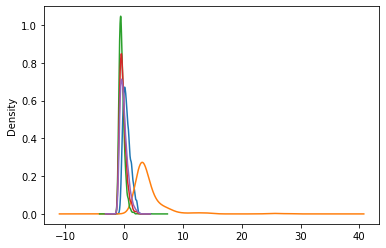

In [40]:
df.groupby(["cluster"])["revenue"].plot(kind="density")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: dti_n, dtype: object

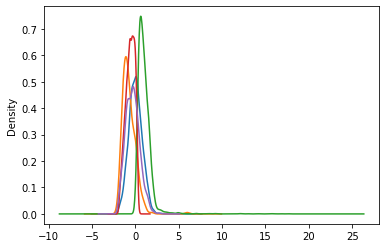

In [41]:
df.groupby(["cluster"])["dti_n"].plot(kind="density")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fico_n, dtype: object

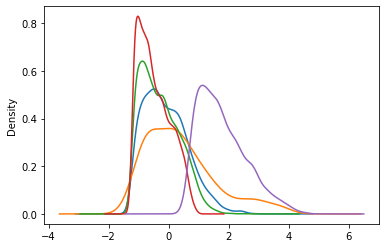

In [42]:
df.groupby(["cluster"])["fico_n"].plot(kind="density")

In [71]:
import pandas as pd
 
df1 = pd.read_csv("prestamos.csv")
df1["home_ownership_n"] = df["home_ownership_n"].astype("category")
df1["purpose"] = df["purpose"].astype("category")
df1["emp_length_n"] = df["emp_length_n"].astype("category")
df1["Default"] = df["Default"].astype("category")

df2 = df[['loan_amnt', 'revenue', 'dti_n','fico_n']]
df3 = df2.copy()
df3 = standard_scaler.transform(df3)
#df3['Default'] = df1['Default']
print(df3)


[[ 1.93548578  0.97876727  0.01070826 -0.36883419]
 [ 1.93548578  0.18176447 -0.973404    3.74393934]
 [ 1.71418835  0.27032033 -1.78499035  0.69744042]
 ...
 [-1.49462437 -0.06619196  0.65691475  0.08814064]
 [-1.49462437 -0.84548359 -0.11485793  1.45906515]
 [-1.49462437 -0.4381266  -0.40069966 -0.52115914]]
